# <span style="color:darkblue"> Lecture 14: Poisson Regression
 </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries </span>


In [2]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Import Stats model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# This is used to create data matrices
import patsy


<font size = "5" >

### <span style="color:darkblue">  II. Example: Labor data </span>

National Longitudinal Survey of Mature and Young Women

https://www.nlsinfo.org/content/cohorts/mature-and-young-women

This dataset contains information from a cohort of women <br>
1968 to 1988. It contains detailed demographic characterics <br>
and we can use this dataset to see the evolution of their wages <br>
over time.

In [3]:
dataset = pd.read_stata("data_raw/nlswork.dta")

<font size = "5" >

Wage data is usually is very highly skewed and heavy tailed

- A small group of individuals with very high wages
- Very typical to see this pattern with earnings data

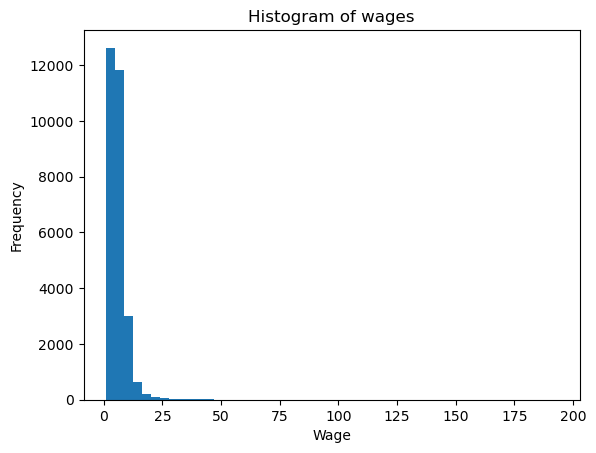

In [4]:
plt.hist(x = dataset["wage"],bins=50)
plt.ylabel("Frequency")
plt.xlabel("Wage")
plt.title("Histogram of wages")
plt.show()

<font size = "5" >

We can see similar outliers in age
- In this case a line would not produce a very good fit

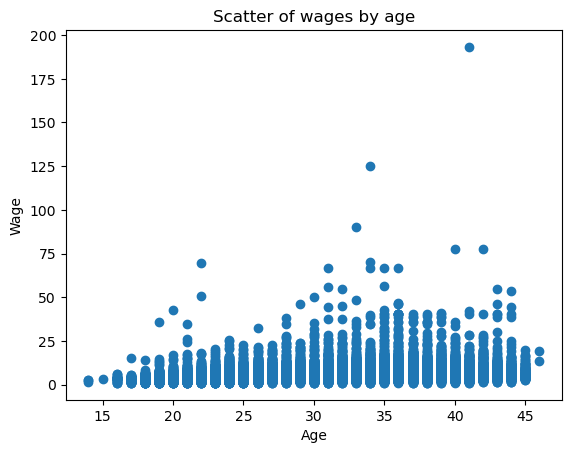

In [7]:
plt.scatter(x = dataset["age"],y = dataset["wage"])
plt.ylabel("Wage")
plt.xlabel("Age")
plt.title("Scatter of wages by age")
plt.show()

<font size = "5" >

### <span style="color:darkblue">  II. Poisson Regression </span>

The poisson regression assumes that 

$ \mathbb{E}[Y \mid X] = e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_K X_K }$

- Great way to model discrete count data
- Also great with heavy tailed data

In [8]:
# Construct data matrix 
y, X = \
    patsy.dmatrices('wage ~ age + tenure + race',
                       dataset)
y = np.ravel(y)

In [9]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type= "HC1")
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28101
Model:                            GLM   Df Residuals:                    28097
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70157.
Date:                Sat, 16 Mar 2024   Deviance:                       40563.
Time:                        16:24:10   Pearson chi2:                 6.16e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2312
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3931      0.020     69.922      0.000       1.354       1.432
age            0.0153      0.001     20.955      0.000       0.014       0.017
tenure         0.0315      0.001     30.482      0.000       0.029       0.033
race          -0.1189      0.008    -15.191      0.000      -0.134      -0.104
==============================================================================
"""

<font size = "5">

Try it yourself

- Explore the dataset
- Explore 3 or four different specifications of the Poisson model
- Practice including a factor, an interaction, and a polynomial <br>
(see Lecture 11)

In [ ]:
# Write your own code




<font size = "5">

Try it yourself

- Estimate your poisson model and a regression model using <br>
a training dataset
- Compute predictions for each model in a test dataset
- Which one performs better out-of-sample? You can use mean square error <br>
as a metric


In [ ]:
# Write your own code


